<a href="https://www.kaggle.com/code/pumpkin18/gender-recognition-by-voise-using-svm?scriptVersionId=121314022" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:500">Gender Recognition By Voise Using Support Vector Machine 👨👧  </div>





<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>


- [1. Introduction](#1)
- [2. Data Preprocessing](#2)
- [3. Model Building](#3)
- [4. Model Evaluation ](#4)
- [5. KFold Cross Validation  ](#5)
- [6. Hyperparameter Optimization using GridSearch CV  ](#6)

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h1>
</div>

Support Vector Machine (SVM) is a powerful and popular machine learning algorithm used for classification and regression tasks. It is a supervised learning method that can be used for both linear and nonlinear data, making it a versatile tool in the data scientist's toolkit. SVM works by finding the optimal hyperplane that maximizes the margin between the two classes in a classification problem. This hyperplane is chosen such that it separates the data into two classes with the maximum distance between them. SVM has several advantages over other machine learning algorithms, such as its ability to handle high-dimensional data, its flexibility in terms of kernel functions, and its ability to handle noisy or overlapping data. SVM has been widely used in various applications such as image classification, text classification, and bioinformatics. In this article, we will dive deeper into how SVM works, its strengths and weaknesses, and some of its practical applications.

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries 
    </h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voicegender/voice.csv


<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Preprocessing
    </h1>
</div>

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Load Data
    </h3>
</div>

In [2]:
df= pd.read_csv('/kaggle/input/voicegender/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Shape of Dataset
    </h3>
</div>

In [3]:
df.shape

(3168, 21)

In [4]:
# view the column names of the dataframe
col_names = df.columns
col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
# check distribution of target_class column
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [6]:
df['label'].replace('male',1,inplace=True)
df['label'].replace('female',0,inplace=True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [7]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [8]:
# check for missing values in variables
df.isnull().sum()


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
# view summary statistics in numerical variables
round(df.describe(),2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,...,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.0
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,...,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17,0.5
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,...,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12,0.5
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,...,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00,0.0
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,...,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10,0.0
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,...,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14,0.5
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,...,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21,1.0
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,...,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93,1.0


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Separating Dependent and Independent Variables
    </h3>
</div>

In [10]:
X = df.drop(['label'], axis=1)
y = df['label']

In [11]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2311,0.215536,0.039201,0.207473,0.193846,0.246154,0.052308,2.137455,7.951889,0.857409,0.211434,0.193846,0.215536,0.174002,0.047856,0.274286,1.182398,0.023438,9.937500,9.914062,0.044866
349,0.150899,0.062383,0.129451,0.099751,0.203394,0.103643,2.689374,12.289471,0.921978,0.510190,0.095655,0.150899,0.101953,0.051546,0.204082,0.809617,0.097656,3.940430,3.842773,0.350911
989,0.188229,0.062654,0.159817,0.132968,0.254003,0.121035,1.870762,6.261814,0.874688,0.286869,0.141065,0.188229,0.131446,0.047291,0.277457,1.801758,0.023438,6.890625,6.867188,0.152575
2100,0.190074,0.033921,0.193308,0.169888,0.213233,0.043346,2.162641,7.631533,0.846709,0.237891,0.168839,0.190074,0.170972,0.015779,0.246154,0.434211,0.054688,4.828125,4.773438,0.115021
1118,0.183465,0.054442,0.173265,0.136410,0.239795,0.103385,1.615562,5.302011,0.898586,0.342237,0.126359,0.183465,0.134925,0.047714,0.277457,0.782012,0.023438,3.281250,3.257812,0.099583


In [13]:
cols = X_train.columns

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Feature Scaling
    </h3>
</div>

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Building
    </h1>
</div>

<img src="https://media.giphy.com/media/dXr0rbo8j6Yhwivo8f/giphy.gif">

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with default hyperparameters
    </h3>
</div>

In [15]:
# instantiate classifier with default hyperparameters
model=SVC() 

# fit classifier to training set
model.fit(X_train,y_train)

# make predictions on test set
y_pred_test=model.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with default hyperparameters: 0.9842


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with rbf kernel and C=100.0
    </h3>
</div>

In [16]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with rbf kernel and C=1000.0
    </h3>
</div>

In [17]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with linear kernel and C=1.0
    </h3>
</div>

In [18]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9732


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with linear kernel and C=100.0
    </h3>
</div>

In [19]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9763


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing SVM with linear kernel and C=1000.0
    </h3>
</div>

In [20]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Running SVM with polynomial kernel and C=1.0
    </h3>
</div>

In [21]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9590


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Running SVM with polynomial kernel and C=100.0
    </h3>
</div>

In [22]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9716


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Running  SVM with sigmoid kernel and C=1.0
    </h3>
</div>

In [23]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.7886


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Runing  SVM with sigmoid kernel and C=100.0
    </h3>
</div>

In [24]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.7855


<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;"> Model Evaluation
    </h1>
</div>

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [25]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.9842
Model Train Accuracy : 0.9846


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix
    </h3>
</div>

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[297   4]
 [  6 327]]

True Positives(TP) =  297

True Negatives(TN) =  327

False Positives(FP) =  4

False Negatives(FN) =  6


<AxesSubplot:>

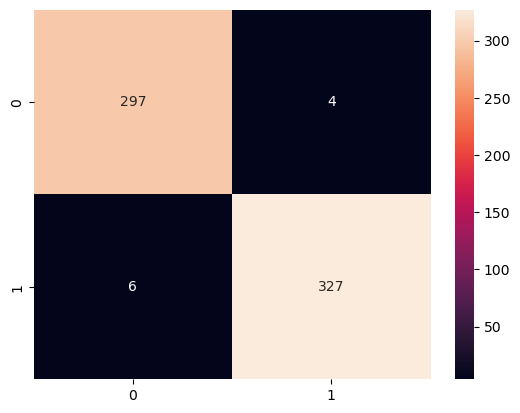

In [27]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Classification Report
    </h3>
</div>

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Scores from Confusion Matrix
    </h3>
</div>

In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9842
Classification error : 0.0158
Precision : 0.9867
Recall or Sensitivity : 0.9802
True Positive Rate : 0.9802
False Positive Rate : 0.0121
Specificity : 0.9879


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h3>
</div>

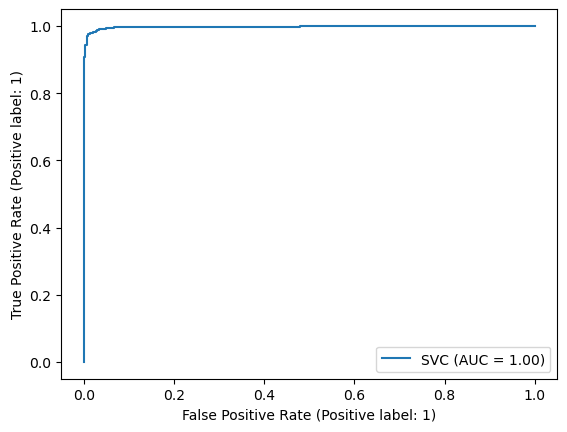

In [30]:
from sklearn import metrics
metrics.plot_roc_curve(svc,X_test,y_test)
plt.show()

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score
    </h3>
</div>

In [31]:
 #compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9843


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #EAFDFC;">
    <h3 style = "padding: 15px; 
                 color: #645CBB;
                 text-align: left;
                 font-family: Trebuchet MS;">Cross Validation Score
    </h3>
</div>

In [32]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9919


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">K Fold Cross Validation
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Stratified k-Fold Cross Validation with shuffle split with  linear kernel
    </h3>
</div>

In [33]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.92744479 0.92113565 0.91798107 0.9178515  0.9178515 ]
Average stratified cross-validation score with linear kernel:0.9205


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Stratified k-Fold Cross Validation with shuffle split with rbf kernel
    </h3>
</div>

In [34]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

# print cross-validation scores with rbf kernel
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

# print average cross-validation score with rbf kernel
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.67981073 0.70820189 0.65457413 0.66824645 0.65244866]
Average stratified cross-validation score with rbf kernel:0.6727


<div id='6'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FFBABA;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Hyperparameter Optimization using GridSearch CV
    </h1>
</div>

In [35]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]


grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)
# examine the best model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [36]:

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9850


Parameters that give the best results : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : SVC(C=10, gamma=0.1)

GridSearch CV score on test set: 0.9842


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>